# MNIST KERAS

In [1]:
#Importing required libraries

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Creating an extra copy for evaluation purposes before changing to categorical
y_test_cpy = y_test 

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Dataset Analysis

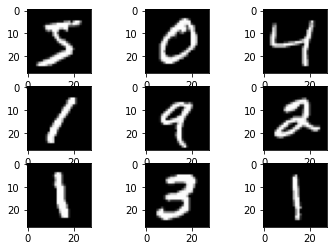

In [3]:
#Plotting dataset to see sample figures

from matplotlib import pyplot
for i in range(9):  
  plt.subplot(330 + 1 + i)
  pyplot.imshow(np.squeeze(x_train[i]), cmap=pyplot.get_cmap('gray'))
pyplot.show()

Text(0.5, 0, 'Digits')

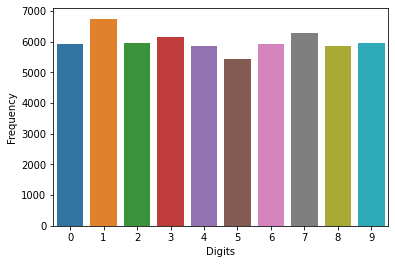

In [4]:
#Checking Class Balance

unique, counts = np.unique(y_train, return_counts=True)
sns.barplot(x = unique, y = counts)
plt.ylabel('Frequency')
plt.xlabel('Digits')

In [5]:
# convert class vectors to binary class matrices
# For Categorical Loss
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
#Keras Wesbite Model

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Model Summary gives output for the:

 1) Total number of parameters: 34826
 
 2) Trainable Parameters: 34826
 
 3) Non-trainable Parameters: 0

In [7]:
#Training Keras Model

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15
422/422 [==============================] - 53s 122ms/step - loss: 0.3565 - accuracy: 0.8939 - val_loss: 0.0837 - val_accuracy: 0.9772
Epoch 2/15
422/422 [==============================] - 41s 97ms/step - loss: 0.1089 - accuracy: 0.9669 - val_loss: 0.0597 - val_accuracy: 0.9837
Epoch 3/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0852 - accuracy: 0.9732 - val_loss: 0.0521 - val_accuracy: 0.9833
Epoch 4/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0709 - accuracy: 0.9783 - val_loss: 0.0437 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0621 - accuracy: 0.9806 - val_loss: 0.0398 - val_accuracy: 0.9893
Epoch 6/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0551 - accuracy: 0.9828 - val_loss: 0.0366 - val_accuracy: 0.9912
Epoch 7/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0514 - accuracy: 0.9838 - val_loss: 0.0343 - val_accura

**Calculate Memory FLOPS/ Memory Footprint**

---



In [8]:
!pip install keras_flops
from keras_flops import get_flops

# Calculae FLOPS
flops = get_flops(model, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
FLOPS: 0.00494 G


In [9]:
#Function to calculate predictions and confusion matrix

from sklearn.metrics import confusion_matrix

def get_metrics(model, x_test, y_test):
  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (10,7))
  sns.heatmap(cm, annot=True)

In [10]:
#Plot Training and Validation Loss and Accurascy Graphs

def plot_loss_acc(history):

    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    epochs = range(1,16)
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    loss_train = history.history['accuracy']
    loss_val = history.history['val_accuracy']
    epochs = range(1,16)
    plt.plot(epochs, loss_train, 'g', label='Training accuracy')
    plt.plot(epochs, loss_val, 'b', label='validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

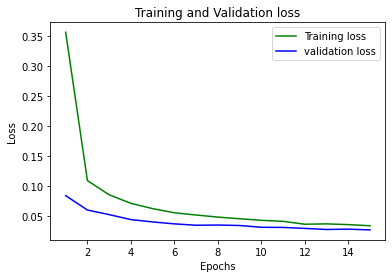

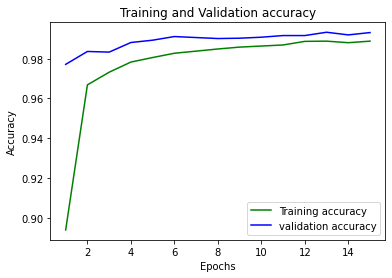

In [11]:
#Keras Model Metrics

plot_loss_acc(history)  

# **Building Deeper Model**

In [12]:
# Adding Additional 2D Conv layers, Maxpooling layers
# Used different activation function such as Tanh

model_deeper = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),
        layers.Conv2D(256, kernel_size=(3, 3), activation="tanh"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="tanh"),
        #fully connected to get all relevant data
        layers.Dense(128, activation='relu'),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

model_deeper.summary()

batch_size = 128
epochs = 15

model_deeper.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",tf.keras.metrics.Precision(),
                              tf.keras.metrics.Recall()])

history_deeper = model_deeper.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 dropout_1 (Dropout)         (None, 9, 9, 128)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 256)         295168    
                                                      

Test loss: 0.03582252189517021
Test accuracy: 0.9914000034332275


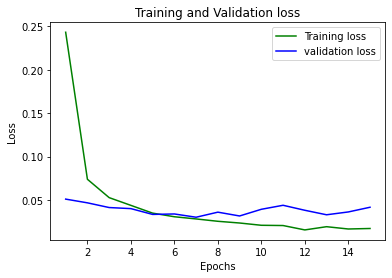

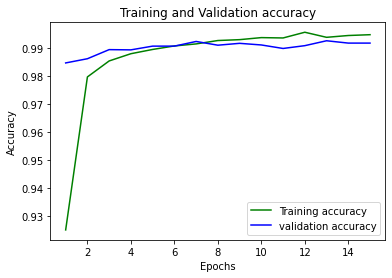

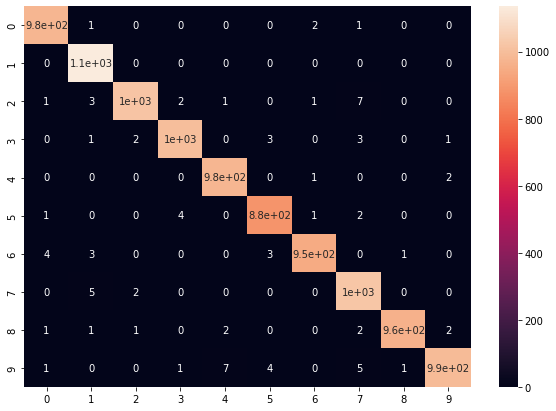

In [13]:
#Deeper Model evaluation, plotting graphs and confusion matrix

score = model_deeper.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plot_loss_acc(history_deeper)
get_metrics(model_deeper, x_test, y_test_cpy)

# **Building Smaller Model**

In [14]:
# Removing layers to keep 1 2D conv layers

model_smaller = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_smaller .summary()

batch_size = 128
epochs = 15

model_smaller.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",tf.keras.metrics.Precision(),
                              tf.keras.metrics.Recall()])

history_smaller  = model_smaller.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
375/375 [==============================] - 19s 49ms/step - loss: 0.4139 - accuracy: 0.8870 - precision_1:

Test loss: 0.024047773331403732
Test accuracy: 0.9915000200271606


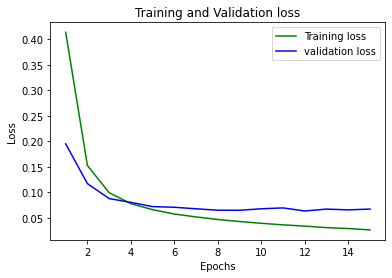

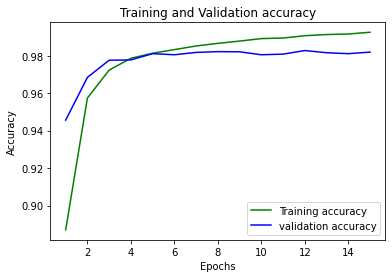

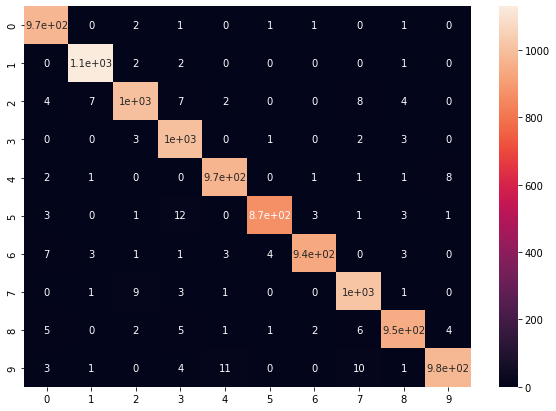

In [15]:
# Evaluation and Metrics for Smaller Model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plot_loss_acc(history_smaller)
get_metrics(model_smaller, x_test, y_test_cpy)

# **Filter**

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


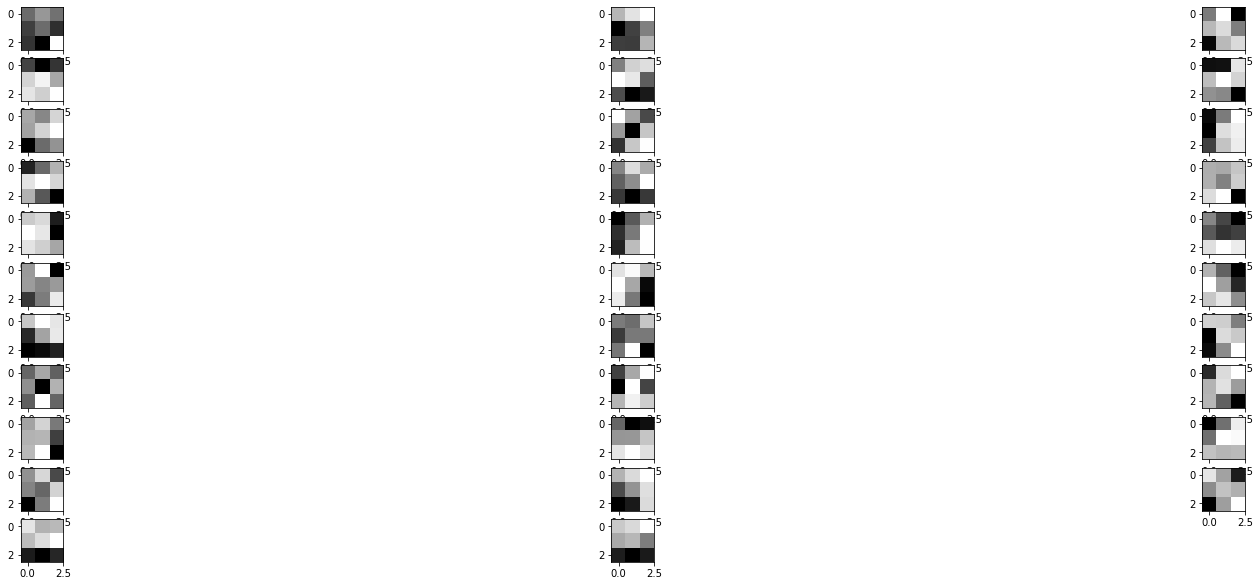

In [16]:

sample = np.expand_dims(x_train[0],axis=0)

#sample /= 255.0

feature_maps = model.predict(sample)

for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

# retrieve weights from the second hidden layer
filters , bias = model.layers[0].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters =32
ix=1
fig = pyplot.figure(figsize=(30,30))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(1):
        # subplot for 6 filters and 3 channels
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters 
pyplot.show()

# **Feature Maps**

(1, 5, 5, 64)


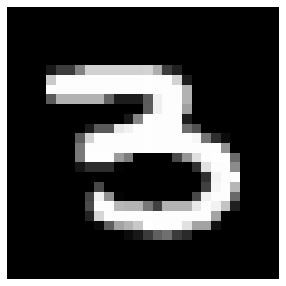

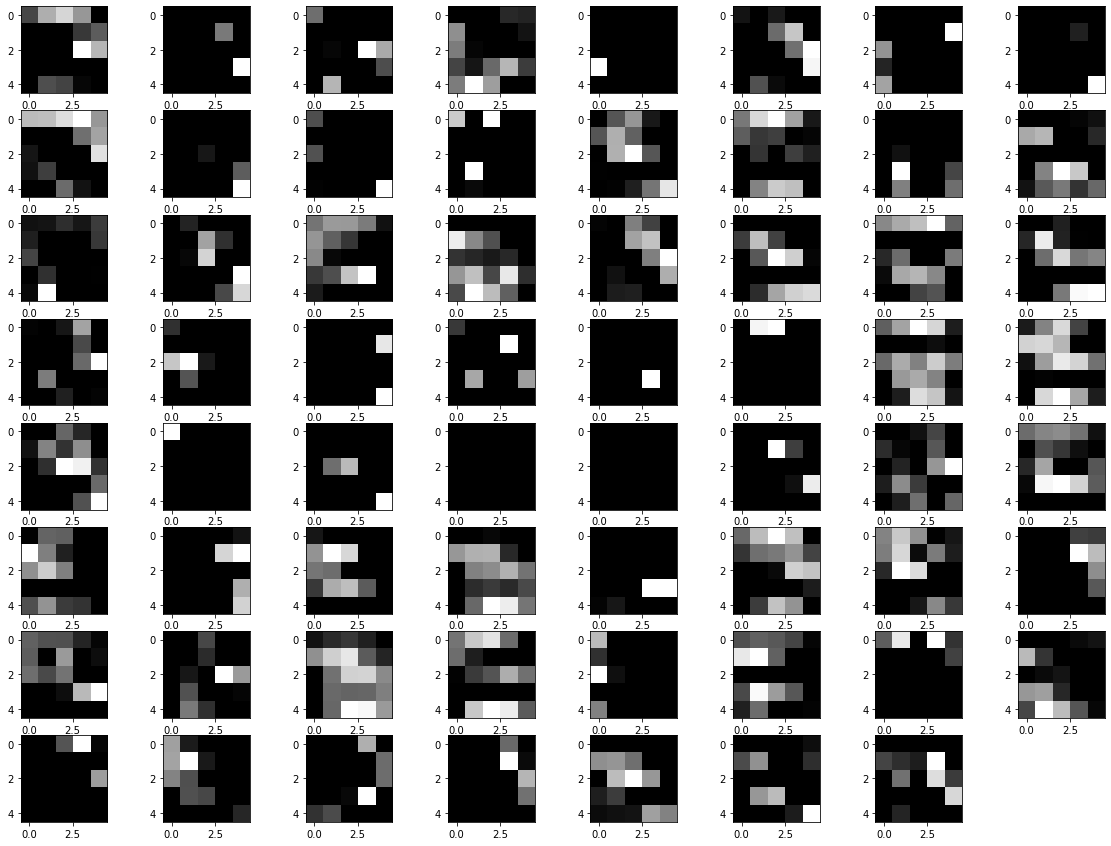

In [17]:
#Displaying Features_map

from keras import models

img = x_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

layer_outputs = [layer.output for layer in model.layers[1:7]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
activations = activation_model.predict(img)

first_layer_activation = activations[2]
print(first_layer_activation.shape)
fig = plt.figure(figsize=(20,15))
for i in range(1,first_layer_activation.shape[3]):
    plt.subplot(8,8,i)
    plt.imshow(first_layer_activation[0,:,:,i] , cmap='gray')
    
plt.show()

